#Projeto 2 - Análise de dados com o python
### Case de cancelamento de clientes

Temos um contexto em que fazemos parte de uma empresa cujo a maioria dos clientes são inativos na base de dados atual, ou seja, são clientes que cancelaram o serviço.

Nosso trabalho é análisar a base de dados e buscar possíveis motivos que levam clientes a cancelar o serviço da empresa e propor alguma solução para isso.

O passo a passo do projeto, desenvolvido em aula segue abaixo:

Passo 1: Importar base de dados

Passo 2: Visualizar base de dados

Passo 3: Limpar a base de dados

Passo 4: Análise dos cancelamentos

Passo 5: Análise da causa dos cancelamentos (como as colunas impactam no cancelamento?)

In [65]:
# Passo 1: Importar a base de dados
import pandas as pd

tabela = pd.read_csv("cancelamentos_sample.csv")
tabela.head()


,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,349936.0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,100634.0,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,301263.0,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,119358.0,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,130955.0,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0


In [66]:
# Passo 2: Visualizar a base de dados
tabela = tabela.drop(columns="CustomerID")
tabela
# colunas inúteis - informações que não te ajudam, te atrapalham

,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


In [67]:
# Passo 3: Corrigir as cagadas da base de dados
tabela.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   50000 non-null  float64
 1   sexo                    49997 non-null  object 
 2   tempo_como_cliente      49998 non-null  float64
 3   frequencia_uso          50000 non-null  float64
 4   ligacoes_callcenter     50000 non-null  float64
 5   dias_atraso             50000 non-null  float64
 6   assinatura              50000 non-null  object 
 7   duracao_contrato        50000 non-null  object 
 8   total_gasto             50000 non-null  float64
 9   meses_ultima_interacao  50000 non-null  float64
 10  cancelou                50000 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.2+ MB


Vemos acima que na variável sexo, temos três valores que são nulos e na variável tempo_como_cliente temos 2 valores que são nulos. Assim, a base de dados parece ter no máximo 5 valores nulos.

Como a base de dados tem 50000 linhas, achamos que seria uma ideia não muito danosa excluir os valores nulos, visto que representam 0.01% da base de dados.

In [68]:
# valores vazios - excluir as linhas que têm valores vazios
tabela = tabela.dropna()

tabela.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49996 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   49996 non-null  float64
 1   sexo                    49996 non-null  object 
 2   tempo_como_cliente      49996 non-null  float64
 3   frequencia_uso          49996 non-null  float64
 4   ligacoes_callcenter     49996 non-null  float64
 5   dias_atraso             49996 non-null  float64
 6   assinatura              49996 non-null  object 
 7   duracao_contrato        49996 non-null  object 
 8   total_gasto             49996 non-null  float64
 9   meses_ultima_interacao  49996 non-null  float64
 10  cancelou                49996 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.6+ MB


Havia 4 valores nulos na base de dados.


Vamos estudar os cancelamentos, para isso coletar algumas informações mais básicas, como por exemplo o número total de pessoas que cancelaram e os que não cancelaram, junto com a porcentagem desses totais

In [69]:
# Passo 4: Análise inicial dos cancelamentos

# quantas pessoas cancelaram e quantas não cancelaram
tabela["cancelou"].value_counts()



cancelou
1.0    28393
0.0    21603
Name: count, dtype: int64

In [70]:
# em percentual
tabela["cancelou"].value_counts(normalize=True)
# tabela["cancelou"].value_counts(normalize=True).map("{:.1%}".format) para ver em porcentagem

cancelou
1.0    0.567905
0.0    0.432095
Name: proportion, dtype: float64

Vemos que cerca de 57% das pessoas cancelaram o serviço e 43% não cancelaram.

Vamos agora tentar encontrar as causas do cancelamento, precisamos visualizar a informação de cancelamento e não cancelamento em relação as outras variáveis disponíveis na base.

Para isso, vamos dispor alguns histogramas, com o cancelamento no eixo y e as outras variáveis no eixo x.

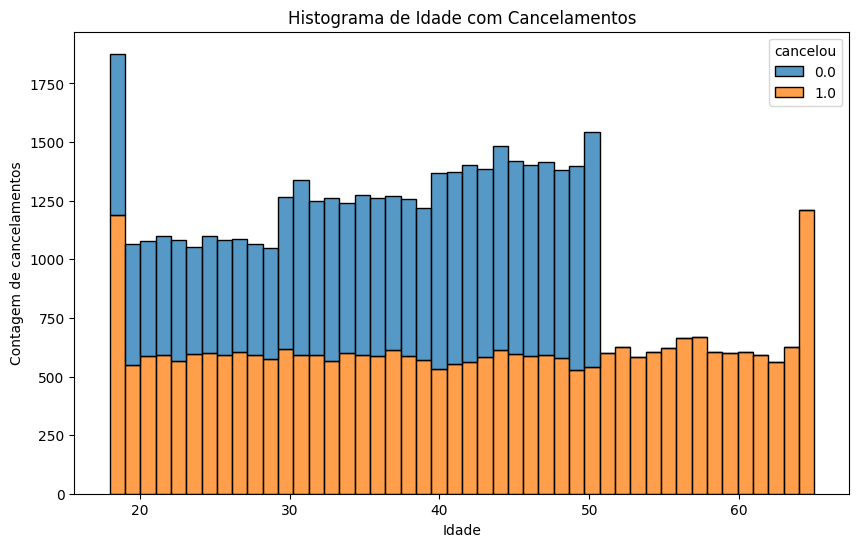

In [71]:
# Passo 5: Análise das causas dos cancelamentos (como as colunas da base impactam no cancelamento)
# gráficos/dashboards

import seaborn as sns
import matplotlib.pyplot as plt

# criar o grafico


plt.figure(figsize=(10, 6))
sns.histplot(data=tabela, x='idade', hue='cancelou', multiple='stack')

plt.title('Histograma de Idade com Cancelamentos')
plt.xlabel('Idade')
plt.ylabel('Contagem de cancelamentos')

plt.show()

 No primeiro gráfico nós podemos ver que todos os clientes acima de uma determinada idade próxima de 50 anos, cancelaram o serviço da empresa.








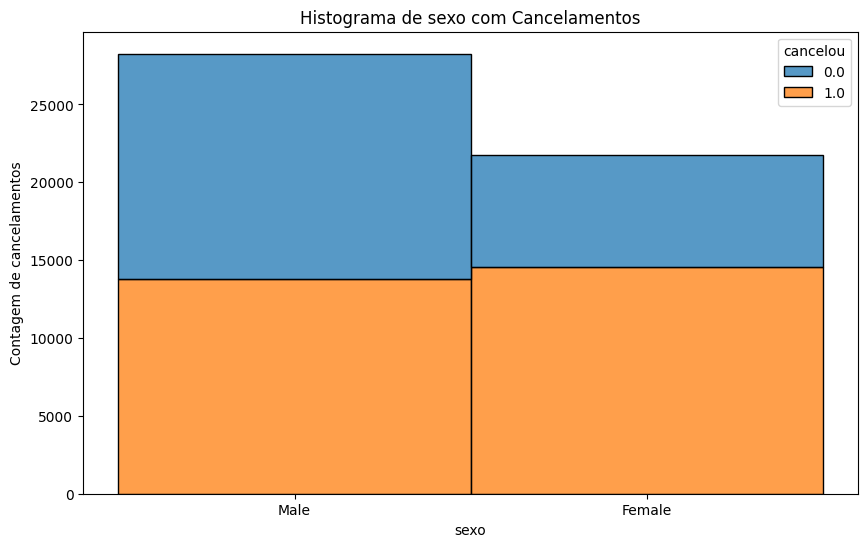

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tabela, x='sexo', hue='cancelou', multiple='stack')

plt.title('Histograma de sexo com Cancelamentos')
plt.xlabel('sexo')
plt.ylabel('Contagem de cancelamentos')

plt.show()

No segundo gráfico, vemos que a maioria dos clientes mulheres cancelaram o serviço da empresa.

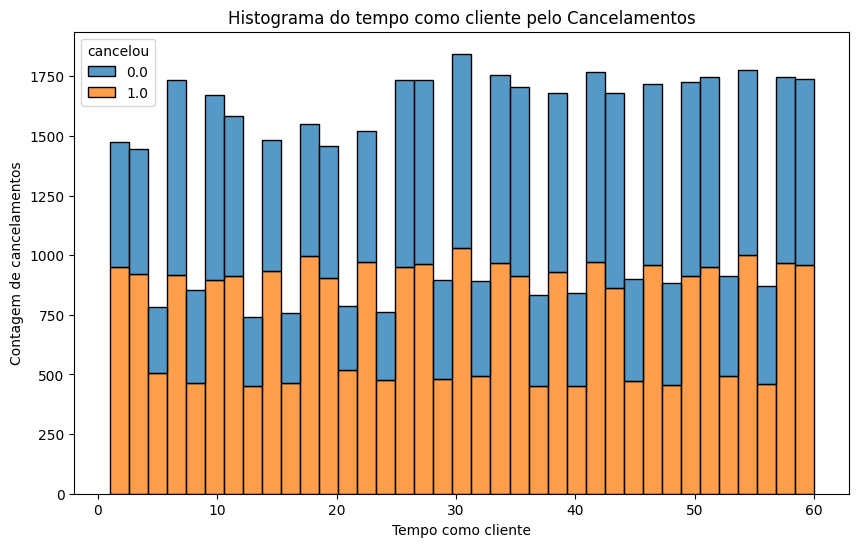

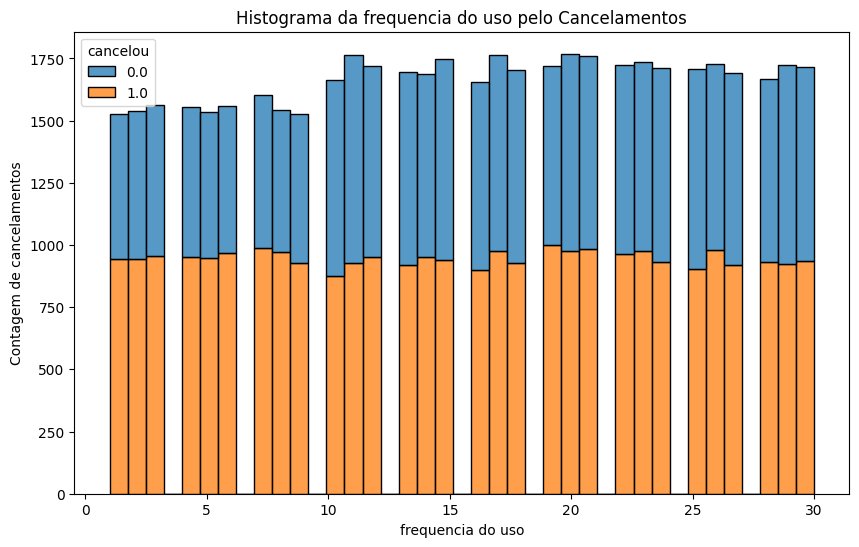

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(data=tabela, x='tempo_como_cliente', hue='cancelou', multiple='stack')

plt.title('Histograma do tempo como cliente pelo Cancelamentos')
plt.xlabel('Tempo como cliente')
plt.ylabel('Contagem de cancelamentos')

plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=tabela, x='frequencia_uso', hue='cancelou', multiple='stack')

plt.title('Histograma da frequencia do uso pelo Cancelamentos')
plt.xlabel('frequencia do uso')
plt.ylabel('Contagem de cancelamentos')

plt.show()

O terceiro e o quarto gráfico parecem ser meio inconclusivos.

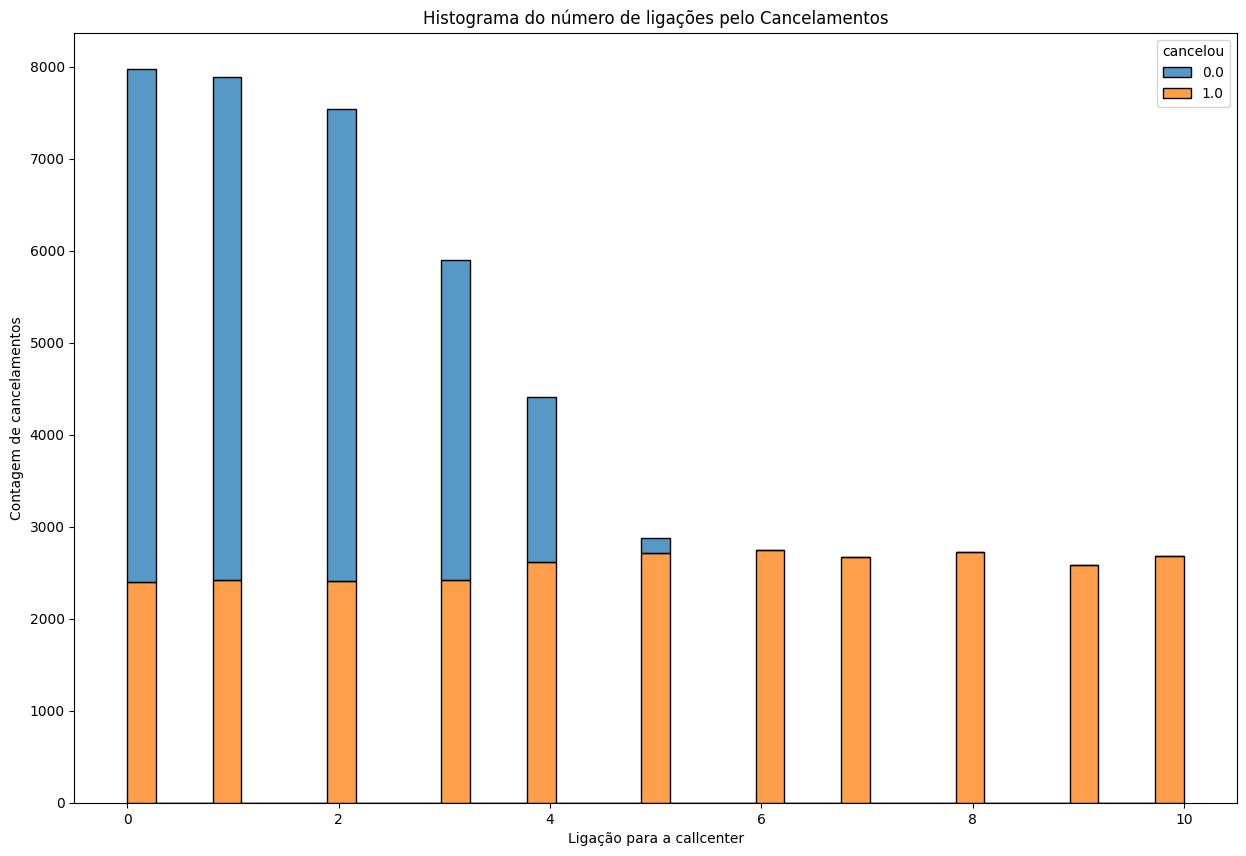

In [74]:

plt.figure(figsize=(15, 10))
sns.histplot(data=tabela, x='ligacoes_callcenter', hue='cancelou', multiple='stack')

plt.title('Histograma do número de ligações pelo Cancelamentos')
plt.xlabel('Ligação para a callcenter')
plt.ylabel('Contagem de cancelamentos')

plt.show()

O quinto gráfico nos diz que após a quarta ligação para o centro de atendimento, os clientes que não tem seu problema resolvido cancelam os serviços da empresa.

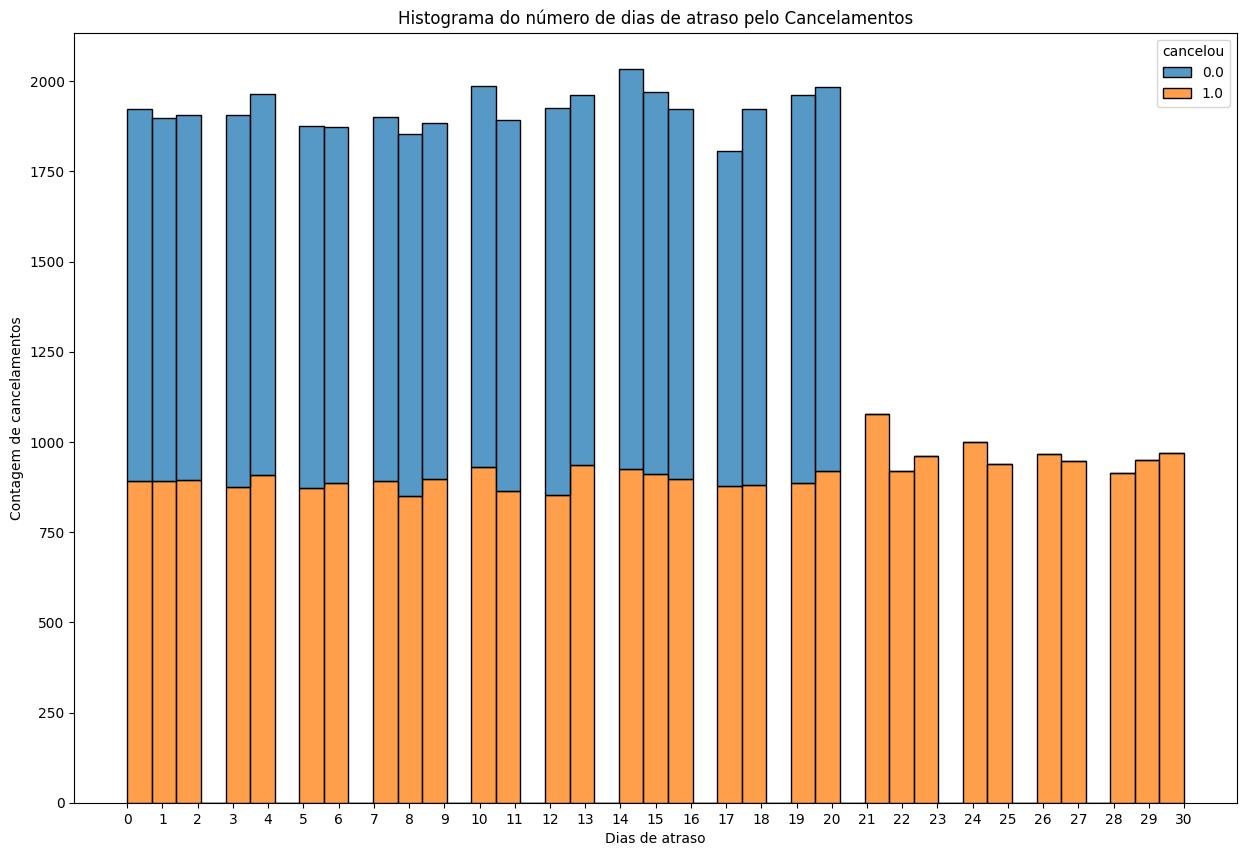

In [75]:
# Criar o gráfico
plt.figure(figsize=(15, 10))
sns.histplot(data=tabela, x='dias_atraso', hue='cancelou', multiple='stack')

# Definir o tipo de dados para 'dias_atraso' como numérico
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(range(int(tabela['dias_atraso'].min()), int(tabela['dias_atraso'].max()) + 1))  # Definir os ticks como todos os valores inteiros de 'dias_atraso'

# Adicionar título e rótulos dos eixos
plt.title('Histograma do número de dias de atraso pelo Cancelamentos')
plt.xlabel('Dias de atraso')
plt.ylabel('Contagem de cancelamentos')

# Mostrar o gráfico
plt.show()

O sexto gráfico nos mostra outro ponto de corte, após 20 ou 21 dias de atraso no serviço, os clientes cancelam os serviçoes da empresa.


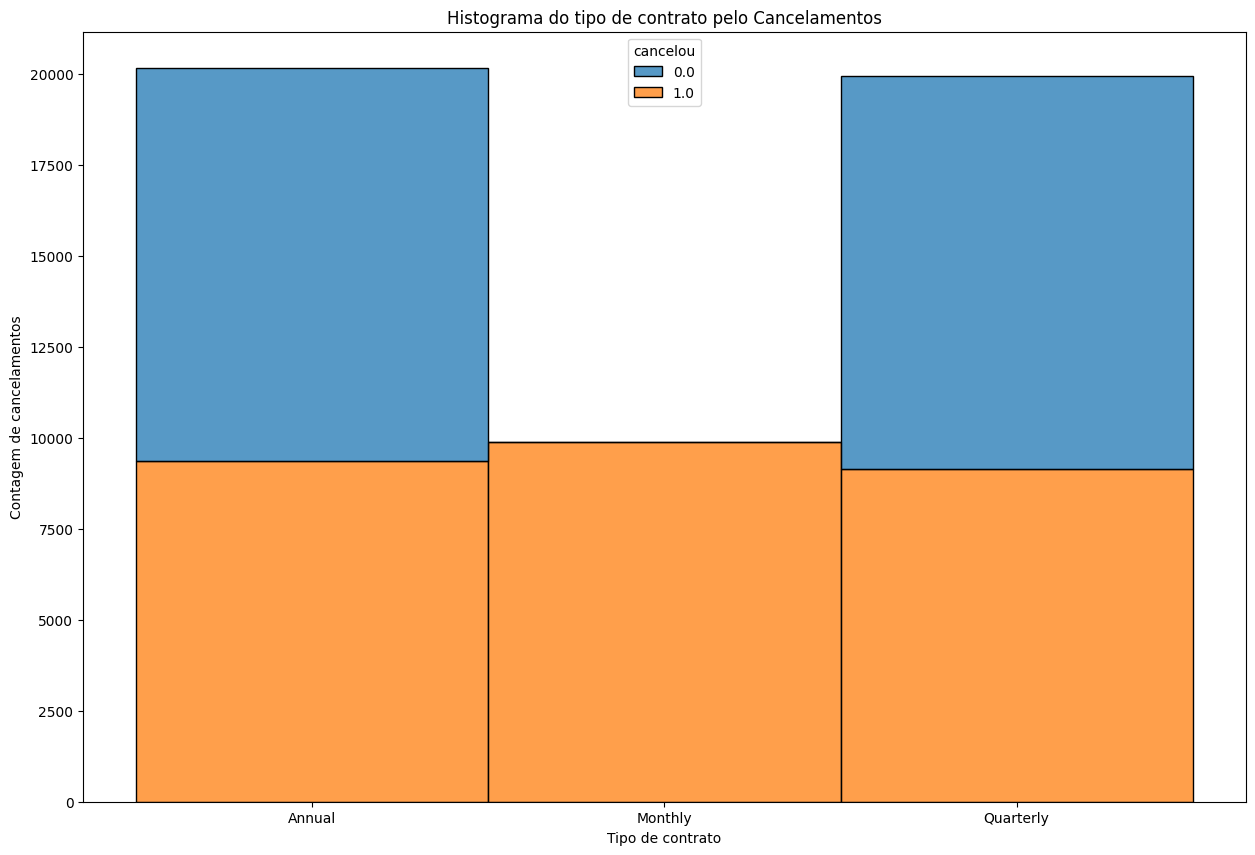

In [78]:
plt.figure(figsize=(15, 10))
sns.histplot(data=tabela, x='duracao_contrato', hue='cancelou', multiple='stack')

plt.title('Histograma do tipo de contrato pelo Cancelamentos')
plt.xlabel('Tipo de contrato')
plt.ylabel('Contagem de cancelamentos')

plt.show()

O sétimo gráfico nos mostra que todos os clientes com contrato mensal com a empresa cancelam os serviços da empresa.

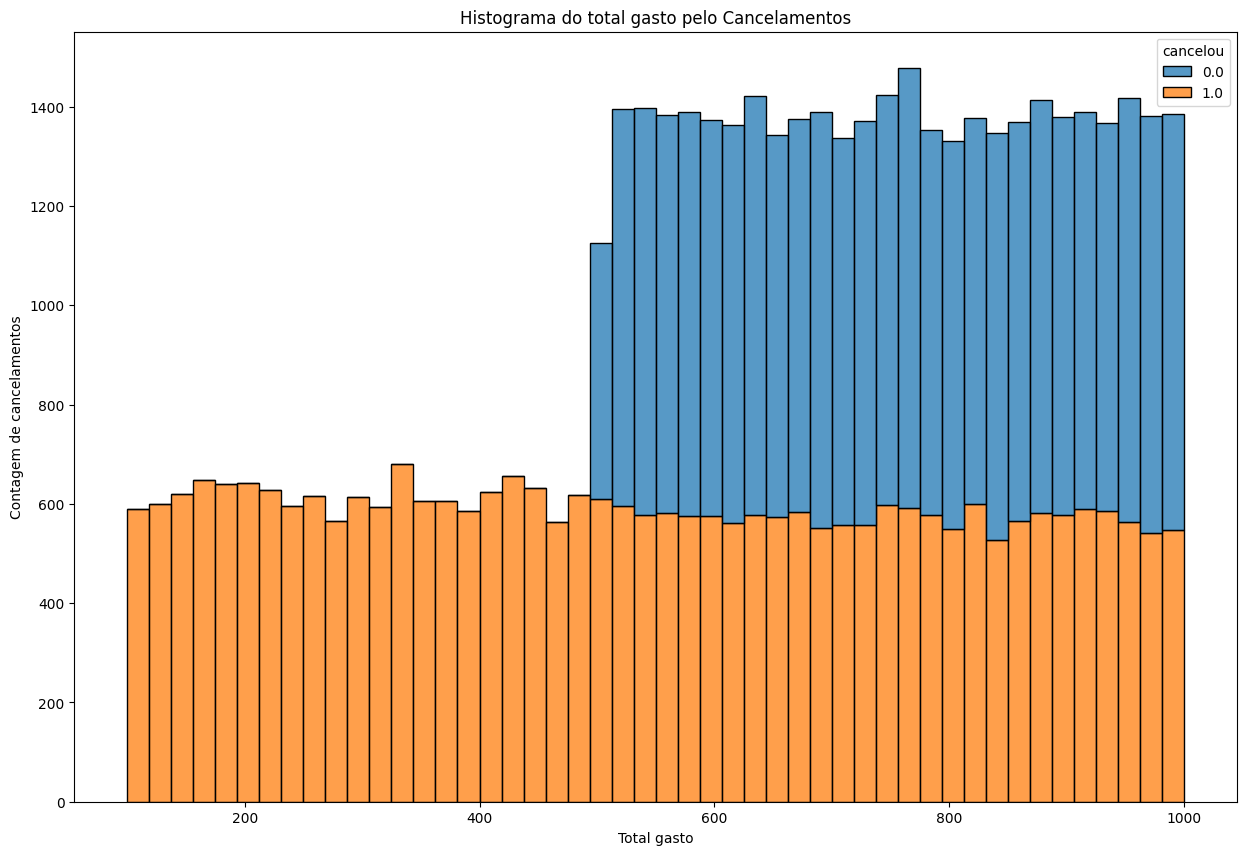

In [79]:
plt.figure(figsize=(15, 10))
sns.histplot(data=tabela, x='total_gasto', hue='cancelou', multiple='stack')

plt.title('Histograma do total gasto pelo Cancelamentos')
plt.xlabel('Total gasto')
plt.ylabel('Contagem de cancelamentos')

plt.show()

O oitavo gráfico nos mostra nos mostra que para valores do total_de_gasto abaixo de um valor perto de 500, os clientes cancelam o serviço da empresa. Como não temos um dicionário para as variáveis, fica difícil interpretar essa variável.

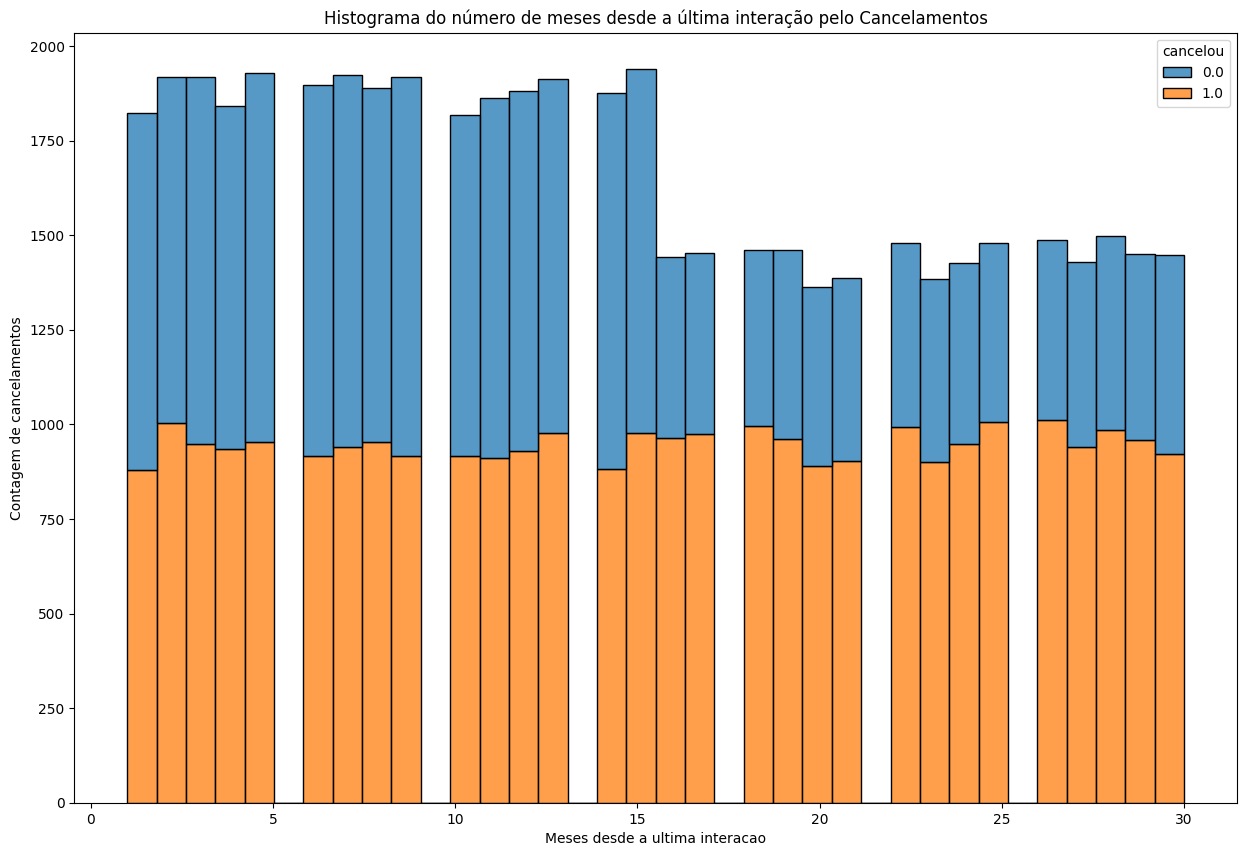

In [80]:
plt.figure(figsize=(15, 10))
sns.histplot(data=tabela, x='meses_ultima_interacao', hue='cancelou', multiple='stack')

plt.title('Histograma do número de meses desde a última interação pelo Cancelamentos')
plt.xlabel('Meses desde a ultima interacao')
plt.ylabel('Contagem de cancelamentos')

plt.show()

O nono gráfico nos mostra que a taxa de cancelamento é levemente maior para valores acima de 15 dos meses da ultima interação.

Por fim, precisamos de uma solução.

Precisamos incentivar os clientes a aderirem por planos anuais e trimestrais ao invés dos mensais, é preciso resolver o problema do cliente até no máximo a quarta ligação ao centro de atendimento e por fim, resolver o problema de atraso em no máximo 20 dias.

Feito isso, temos o resultado abaixo.

In [30]:
# clientes do contrato mensal TODOS cancelam
    # ofercer desconto nos planos anuais e trimestrais
# clientes que ligam mais do que 4 vezes para o call center, cancelam
    # criar um processo para resolver o problema do cliente em no máximo 4 ligações
# clientes que atrasaram mais de 20 dias, cancelaram
    # política de resolver atrasos em até 20 dias (equipe financeira)

tabela = tabela[tabela["duracao_contrato"]!="Monthly"]
tabela = tabela[tabela["ligacoes_callcenter"]<=4]
tabela = tabela[tabela["dias_atraso"]<=20]

display(tabela["cancelou"].value_counts())
# em percentual
display(tabela["cancelou"].value_counts(normalize=True))

cancelou
0.0    21446
1.0     4821
Name: count, dtype: int64

cancelou
0.0    0.816462
1.0    0.183538
Name: proportion, dtype: float64

Tendo tomado as ações acima, o percentual de clientes que cancelaram os serviçoes da empresa cairam para 18%.